## In this notebook: 

## Process output from mefinder

        MGEs on which contigs, coverage, identity, length, etc...


In [2]:
import pandas as pd
import seaborn as sns
import os
import matplotlib.pyplot as plt
import pylab
# set directory
os.chdir('/Greywater_Data/')

In [3]:
# sample names
sample_id = ["house_1_raw", "house_1_treat",
             "house_2_raw", "house_2_treat",
             "house_3_raw", "house_3_treat",
             "house_4_raw", "house_4_treat",
             "house_5_raw", "house_5_treat"]#, 
            #"raw_greywater_merged"]

split_sample_id = ["house_1_treat","house_2_treat","house_5_treat"]#,"raw_greywater_merged"]

## Process mefinder output

In [29]:
# merge split scaffolds output files
for i in range (0,4):
    mge_merge = None
    for j in range (0,4):
        mge_df = pd.read_csv(f"MGEs/MGEs_mefinder_output/output_{split_sample_id[i]}_scaffolds_{j}.csv", delimiter = ",", skiprows=5)
        if mge_merge is None:
            mge_merge = mge_df
        else:
            mge_merge = pd.concat([mge_merge, mge_df])
    mge_merge.to_csv(f"MGEs/MGEs_mefinder_output/output_{split_sample_id[i]}.csv", index = False)
    

In [32]:
# get contig ID for mefinder output file
unique_MGEs = []

for i in range (0,11):
    mefinder_out = f"MGEs/MGEs_mefinder_output/output_{sample_id[i]}.csv"
    if i in [1,3,9,10]:
        n = 0
    else: 
        n = 5
    
    MGE_df = pd.read_csv(mefinder_out, delimiter = ",", skiprows = n)
    c = len(MGE_df["contig"].unique())
    m = len(MGE_df["name"].unique())
    unique_MGEs.append(m)
    MGE_df = MGE_df.set_index("contig")
    MGE_df.to_csv(f"MGEs/MGEs_mefinder_output/{sample_id[i]}.csv")
    print(f"{m} MGEs found in {c} scaffolds from {sample_id[i]} sample.")


80 MGEs found in 100 scaffolds from house_1_raw sample.
57 MGEs found in 69 scaffolds from house_1_treat sample.
169 MGEs found in 208 scaffolds from house_2_raw sample.
131 MGEs found in 170 scaffolds from house_2_treat sample.
147 MGEs found in 234 scaffolds from house_3_raw sample.
133 MGEs found in 154 scaffolds from house_3_treat sample.
79 MGEs found in 95 scaffolds from house_4_raw sample.
70 MGEs found in 84 scaffolds from house_4_treat sample.
88 MGEs found in 110 scaffolds from house_5_raw sample.
78 MGEs found in 89 scaffolds from house_5_treat sample.
265 MGEs found in 433 scaffolds from raw_greywater_merged sample.


### Quality control for mefinder output

In [25]:
unique_MGEs = []
for sample in sample_id:
    ### Read in processed results
    df = pd.read_csv(f"MGEs/MGEs_mefinder_output/{sample}.csv")
    df_qc = df[(df['identity'] >= 0.95) & (df['coverage'] >= 0.9)]
    n = len(df_qc['name'].unique())
    unique_MGEs.append(n) # save number of unique MEGs for each sample
    m = len(df_qc['contig'].unique())
    print(f"{sample} has {n} MEGs in {m} scaffolds passing QC.")
    df_qc.to_csv(f'MGEs/MGEs_mefinder_output/{sample}_MGE_QCd.csv')
"""
    ### Write list of MGEs for each sample to a txt list file
    MGE_list = list(df_qc['name'].unique())
    with open(f'MGEs/MGEs_mefinder_output/MGElists/{sample}_qcd_MGElist.txt', 'w') as f:
        for MGE in MGE_list:
            f.write(MGE+'\n')
    ### Write list of contigs for each sample to a txt list file
    contig_list = list(df_qc['contig'].unique())
    with open(f'MGEs/MGEs_mefinder_output/MGE_contig/{sample}_qcd_MGE_contigID.txt', 'w') as f:
        for contig in contig_list:
            f.write(contig+'\n')
"""
    

house_1_raw has 20 MEGs in 18 scaffolds passing QC.
house_1_treat has 11 MEGs in 11 scaffolds passing QC.
house_2_raw has 55 MEGs in 54 scaffolds passing QC.
house_2_treat has 31 MEGs in 30 scaffolds passing QC.
house_3_raw has 44 MEGs in 46 scaffolds passing QC.
house_3_treat has 37 MEGs in 37 scaffolds passing QC.
house_4_raw has 21 MEGs in 21 scaffolds passing QC.
house_4_treat has 23 MEGs in 23 scaffolds passing QC.
house_5_raw has 34 MEGs in 33 scaffolds passing QC.
house_5_treat has 19 MEGs in 19 scaffolds passing QC.


"\n    ### Write list of MGEs for each sample to a txt list file\n    MGE_list = list(df_qc['name'].unique())\n    with open(f'MGEs/MGEs_mefinder_output/MGElists/{sample}_qcd_MGElist.txt', 'w') as f:\n        for MGE in MGE_list:\n            f.write(MGE+'\n')\n    ### Write list of contigs for each sample to a txt list file\n    contig_list = list(df_qc['contig'].unique())\n    with open(f'MGEs/MGEs_mefinder_output/MGE_contig/{sample}_qcd_MGE_contigID.txt', 'w') as f:\n        for contig in contig_list:\n            f.write(contig+'\n')\n"

In [16]:
# Construct dataframe with number of MGEs
MGEs_results = pd.DataFrame(unique_MGEs, index = sample_id, columns = ["Number of MGEs detected"])
sample_type = ["raw", "treated", "raw", "treated","raw", "treated","raw", "treated","raw", "treated"]
house_number = [1,1,2,2,3,3,4,4,5,5]
MGEs_results["Sample type"] = sample_type
MGEs_results["House number"] = house_number

In [19]:
MGEs_results.to_csv('MGEs/MGEs_mefinder_output/MEC_occurrence_QCd.csv')

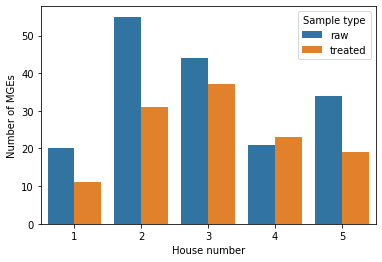

In [21]:
#MGEs = MGEs_results.drop("raw_greywater_merged")

ax = sns.barplot(data=MGEs_results, x = "House number", y = "Number of MGEs detected", hue = "Sample type")
#plt.xticks(rotation=30, horizontalalignment="right")
plt.ylabel("Number of MGEs")
plt.savefig('MGEs/figures/mefinder_detected_metaspades_scaffolds_qcd.pdf',bbox_inches='tight')

In [48]:
# concat raw and treated greywater sample results
raw_sum = None
treated_sum = None
for i in range (0,10):
    MGEs = pd.read_csv(f"MGEs/MGEs_mefinder_output/{sample_id[i]}.csv", delimiter = ",", index_col = 0)
    if i in [0,2,4,6,8]:
        if raw_sum is None:
            raw_sum = MGEs
        else:
            raw_sum = pd.concat([raw_sum, MGEs])
    else:
        if treated_sum is None:
            treated_sum = MGEs
        else:
            treated_sum = pd.concat([treated_sum, MGEs])

raw_sum.to_csv("MGEs/MGEs_mefinder_output/raw_greywater_MGEs_sum.csv")
treated_sum.to_csv("MGEs/MGEs_mefinder_output/treated_greywater_MGEs_sum.csv")
m=len(raw_sum["name"].unique())
c=len(raw_sum.index.unique())
print(f"{m} MGEs found in {c} scaffolds from raw greywater sample.")
m=len(treated_sum["name"].unique())
c=len(treated_sum.index.unique())
print(f"{m} MGEs found in {c} scaffolds from treated greywater sample.")


328 MGEs found in 747 scaffolds from raw greywater sample.
273 MGEs found in 566 scaffolds from treated greywater sample.


#### 328 MGEs found in 747 scaffolds from raw greywater sample.

#### 273 MGEs found in 566 scaffolds from treated greywater sample.

### Venn diagram for MGEs

https://www.molbiotools.com/listcompare.php

In [62]:
# write lists of MGE names
for i in range (0, 11):
    MGEs = pd.read_csv(f"MGEs/MGEs_mefinder_output/{sample_id[i]}.csv", delimiter = ",", index_col =0)
    MGE_list = list(MGEs["name"].unique())
    with open(f"MGEs/MGEs_mefinder_output/{sample_id[i]}_MGEs.txt", "w") as f:
        for row in MGE_list:
            f.write(row+"\n")

In [63]:
# write lists of unique MGE names from raw/treated greywater summarized list
raw_sum = pd.read_csv("MGEs/MGEs_mefinder_output/raw_greywater_MGEs_sum.csv", delimiter=',', index_col=0)
MGE_list = list(raw_sum["name"].unique())
with open(f"MGEs/MGEs_mefinder_output/raw_sum_MGEs.txt", "w") as f:
    for row in MGE_list:
        f.write(row+"\n")
treated_sum = pd.read_csv("MGEs/MGEs_mefinder_output/treated_greywater_MGEs_sum.csv", delimiter=',', index_col=0)
MGE_list = list(treated_sum["name"].unique())
with open(f"MGEs/MGEs_mefinder_output/treated_sum_MGEs.txt", "w") as f:
    for row in MGE_list:
        f.write(row+"\n")

In [146]:
MGEs_summary = pd.concat([raw_sum, treated_sum])
MGEs_type = MGEs_summary.groupby(["name"]).first()[['synonyms','type']]

## Depths of MGEs in samples

In [77]:

with open(f"MGEs/MGEs_mefinder_output/raw_sum_MGEs.txt", "r") as f:
    MGEs_list1 = [line.rstrip('\n') for line in f]
    print(len(MGEs_list1))
with open(f"MGEs/MGEs_mefinder_output/treated_sum_MGEs.txt", "r") as f:
    MGEs_list2 = [line.rstrip('\n') for line in f]
    print(len(MGEs_list2))

MGEs_list = list(set(MGEs_list1 + MGEs_list2))
print(len(MGEs_list))

328
273
449


In [160]:
MGEs_depth = pd.DataFrame(index = MGEs_list, columns = sample_id[0:10])
for i in range (0,10):
    sample_MGEs = pd.read_csv(f"MGEs/MGEs_mefinder_output/{sample_id[i]}.csv", delimiter = ",", index_col =0)
    sample_MGEs = sample_MGEs.groupby(["name"]).sum()
    MGEs_depth.loc[list(sample_MGEs.index), [sample_id[i]]] = sample_MGEs["depth"]
MGEs_depth = MGEs_depth.fillna(0)

In [161]:
MGEs_depth['type']=0
MGEs_depth.loc[list(MGEs_type.index), ['type']] = MGEs_type["type"]
MGEs_bytype = MGEs_depth.groupby(['type']).sum()
MGEs_depth = MGEs_depth.drop(columns=['type'])
MGEs_bytype

,house_1_raw,house_1_treat,house_2_raw,house_2_treat,house_3_raw,house_3_treat,house_4_raw,house_4_treat,house_5_raw,house_5_treat
type,,,,,,,,,,
composite transposon,1638.141,0.000,12.154,41.425,0.000,6.524,36.131,0.000,0.000,0.000
insertion sequence,27433.341,1110.137,4586.806,8376.041,10520.265,3850.480,9158.157,2708.408,16837.331,4081.268
mite,53.221,12.844,22.404,3.216,42678.669,33.570,15.980,1.928,54.628,2.113
unit transposon,5.573,16.617,19.440,202.709,33.091,0.000,432.292,175.415,781.602,215.693


### Barplot by MGE type

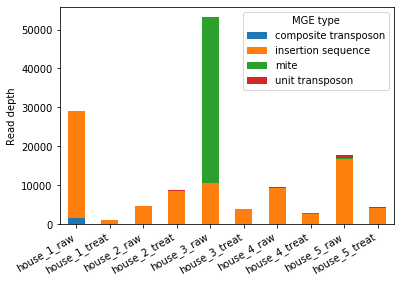

In [166]:
ax = MGEs_bytype.transpose().plot.bar(stacked = True)
plt.xticks(rotation=30, horizontalalignment="right")
plt.ylabel("Read depth")
plt.legend(title='MGE type')
plt.savefig('MGEs/figures/MGEs_depth_by_type_mefinder_detected_metaspades_scaffolds.pdf',bbox_inches='tight')

### Sort MGEs by depth

In [172]:
MGEs_depth["sum"] = MGEs_depth.sum(axis=1)
MGEs_depth_top_20 = MGEs_depth.sort_values(by = "sum", ascending = False).head(20).drop(columns=["sum"])
MGEs_depth = MGEs_depth.drop(columns=['sum'])
MGEs_depth_top_20.head()

,house_1_raw,house_1_treat,house_2_raw,house_2_treat,house_3_raw,house_3_treat,house_4_raw,house_4_treat,house_5_raw,house_5_treat
MITEAeme1,3.509,0.000,4.676,0.0,42339.964,30.803,0.00,0.96,18.276,2.113
IS1088,0.000,5.037,205.452,0.0,0.000,0.000,2893.24,0.00,10752.911,1636.828
ISAeme19,5515.909,0.000,53.214,0.0,47.312,0.000,0.00,0.00,33.207,2.079
ISSod9,3436.164,0.000,0.000,0.0,82.442,0.000,0.00,0.00,0.000,0.000
ISPa31,2140.175,0.000,0.000,0.0,0.000,0.000,0.00,0.00,0.000,0.000


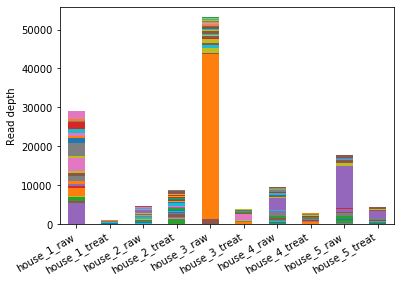

In [173]:
NUM_COLORS = 20
cm = pylab.get_cmap('tab20')
colors = []
for i in range(NUM_COLORS):
    colors.append(cm(1.*i/NUM_COLORS))
    
#ax = MGEs_depth_top_20.transpose().plot.bar(stacked = True, color=colors)
ax = MGEs_depth.transpose().plot.bar(stacked = True,legend=False)
plt.xticks(rotation=30, horizontalalignment="right")
plt.ylabel("Read depth")
#ax.legend(bbox_to_anchor=(1.02, 1.05))
plt.savefig('MGEs/figures/MGEs_depth_mefinder_detected_metaspades_scaffolds.pdf',bbox_inches='tight')

---
### Taxa classification + MGE occurrence

In [28]:
for sample in sample_id:
    taxa_df = pd.read_csv(f'taxonomy/MGE_contig_taxa/{sample}_kraken2out.txt', delimiter = '\t', index_col = 1, header = None)
    taxa_df = taxa_df.drop(columns=[0,3,4]).rename(columns = {2: 'taxonomy'})
    mge_df = pd.read_csv(f'MGEs/MGEs_mefinder_output/{sample}_MGE_QCd.csv', index_col=1)
    
    MGE_taxa = mge_df[['name', 'type', 'prediction']]
    MGE_taxa.loc[list(MGE_taxa.index), "taxonomy"] = taxa_df['taxonomy']
    MGE_taxa['taxonomy'] = MGE_taxa['taxonomy'].str.replace(r"\(.*\)","")
    MGE_taxa['occurrence'] = 1
    MGE_taxa.to_csv(f'MGEs/MGEs_mefinder_output/{sample}_MGE-taxa.csv')

/Users/shuaishuai/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:845: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/Users/shuaishuai/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/Users/shuaishuai/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try u

In [30]:
raw = [sample_id[i] for i in [0,2,4,6,8]]
raw_sum = None
for sample in raw: 
    df = pd.read_csv(f'MGEs/MGEs_mefinder_output/{sample}_MGE-taxa.csv', index_col = 0)
    if raw_sum is None: 
        raw_sum = df
    else: 
        raw_sum = pd.concat([raw_sum, df])
co_occurrence = raw_sum.groupby(by = ['name', 'taxonomy']).sum()
co_occurrence.to_csv('MGEs/MGEs_mefinder_output/co_occurrence_raw_QCd.csv')
raw_sum.to_csv('MGEs/MGEs_mefinder_output/occurrence_raw_QCd.csv')
print(co_occurrence.shape) # 151 MGE-taxon pairs

In [32]:
treat = [sample_id[i] for i in [1,3,5,7,9]]
treat_sum = None
for sample in treat: 
    df = pd.read_csv(f'MGEs/MGEs_mefinder_output/{sample}_MGE-taxa.csv', index_col = 0)
    if treat_sum is None: 
        treat_sum = df
    else: 
        treat_sum = pd.concat([treat_sum, df])
co_occurrence = treat_sum.groupby(by = ['name', 'taxonomy']).sum()
co_occurrence.to_csv('MGEs/MGEs_mefinder_output/co_occurrence_treat_QCd.csv')
treat_sum.to_csv('MGEs/MGEs_mefinder_output/occurrence_treat_QCd.csv')
print(co_occurrence.shape) # 107 MEG-taxon pairs

(107, 1)


---
### Occurrence of MGEs by type

In [35]:
print(raw_sum.shape)
raw_sum.head()

(178, 5)


,name,type,prediction,taxonomy,occurrence
contig,,,,,
NODE_4_length_279011_cov_60.069721,ISPsme1,insertion sequence,predicted,Pseudomonas aeruginosa,1
NODE_7_length_211023_cov_14.721626,ISAeca5,insertion sequence,predicted,Tolumonas auensis DSM 9187,1
NODE_136_length_68915_cov_435.755809,ISPa1635,insertion sequence,predicted,Pseudomonas alcaligenes,1
NODE_149_length_65963_cov_16.662029,ISAeme22,insertion sequence,predicted,Tolumonas auensis DSM 9187,1
NODE_316_length_41413_cov_618.132042,ISPre2,insertion sequence,predicted,Pseudomonas aeruginosa,1


In [36]:
print(treat_sum.shape)
treat_sum.head()

(121, 5)


,name,type,prediction,taxonomy,occurrence
contig,,,,,
NODE_455_length_59395_cov_16.616549,Tn6196,unit transposon,predicted,Pseudomonas oryzae,1
NODE_1575_length_20611_cov_11.166959,ISAju1,insertion sequence,predicted,Acinetobacter haemolyticus,1
NODE_72782_length_1428_cov_5.503277,IS17,insertion sequence,predicted,Acinetobacter johnsonii,1
NODE_97908_length_1197_cov_2.102452,ISAisp1,insertion sequence,predicted,Acidovorax sp. JMULE5,1
NODE_110407_length_1117_cov_4.873823,IS6100,insertion sequence,predicted,Pandoraea pnomenusa 3kgm,1


In [96]:
raw_MGEs = list(raw_sum['name'].unique())
with open('MGEs/MGEs_mefinder_output/MGElists/Raw_qcd_MGElist.txt','w') as f:
    for MGE in raw_MGEs:
        f.write(MGE+'\n')
treat_MGEs = list(treat_sum['name'].unique())
with open('MGEs/MGEs_mefinder_output/MGElists/Treated_qcd_MGElist.txt','w') as f:
    for MGE in treat_MGEs:
        f.write(MGE+'\n')

In [38]:
raw_type = raw_sum.groupby(by = 'type').sum()
print(raw_type.shape)
raw_type

(4, 1)


,occurrence
type,
composite transposon,3
insertion sequence,165
mite,5
unit transposon,5


In [39]:
treat_type = treat_sum.groupby(by = 'type').sum()
print(treat_type.shape)
treat_type

(3, 1)


,occurrence
type,
insertion sequence,117
mite,1
unit transposon,3


---
## Barplot of MGE numbers by type

In [12]:
shared = [1,1,13,13,16,16,8,8,9,9]
shared_df = pd.DataFrame(shared, index=sample_id, columns=['Shared'])
shared_df.T

,house_1_raw,house_1_treat,house_2_raw,house_2_treat,house_3_raw,house_3_treat,house_4_raw,house_4_treat,house_5_raw,house_5_treat
Shared,1,1,13,13,16,16,8,8,9,9


In [4]:
type_sum = None
for sample in sample_id:
    df = pd.read_csv(f'MGEs/MGEs_mefinder_output/{sample}_MGE_QCd.csv', index_col = 3)
    df[f'{sample}'] = 1
    df = df[['prediction', 'type', f'{sample}']]
    if type_sum is None:
        type_sum = df
    else:
        type_sum = pd.concat([type_sum, df]).fillna(0)

In [5]:
type_sum.sample(5)

,prediction,type,house_1_raw,house_1_treat,house_2_raw,house_2_treat,house_3_raw,house_3_treat,house_4_raw,house_4_treat,house_5_raw,house_5_treat
name,,,,,,,,,,,,
ISAba33,predicted,insertion sequence,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
ISAs21,predicted,insertion sequence,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
ISAisp1,predicted,insertion sequence,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
IS903,predicted,insertion sequence,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
ISVsa3,predicted,insertion sequence,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
type_df = type_sum.groupby(by = 'type').sum()
type_df

,house_1_raw,house_1_treat,house_2_raw,house_2_treat,house_3_raw,house_3_treat,house_4_raw,house_4_treat,house_5_raw,house_5_treat
type,,,,,,,,,,
composite transposon,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
insertion sequence,18.0,10.0,54.0,30.0,42.0,36.0,20.0,23.0,31.0,18.0
mite,0.0,0.0,0.0,0.0,4.0,1.0,0.0,0.0,1.0,0.0
unit transposon,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,1.0


In [7]:
type_df.loc['insertion sequence',]/type_df.sum()

house_1_raw      0.900000
house_1_treat    0.909091
house_2_raw      0.964286
house_2_treat    0.967742
house_3_raw      0.893617
house_3_treat    0.972973
house_4_raw      0.952381
house_4_treat    1.000000
house_5_raw      0.911765
house_5_treat    0.947368
dtype: float64

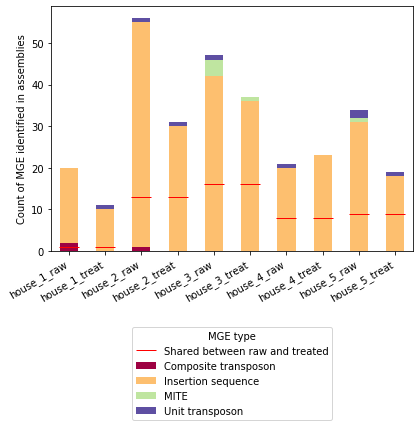

In [35]:
plt.rcParams['figure.figsize'] = [6.5, 4.5] 
ax1 = type_df.transpose().plot.bar(stacked = True, colormap = "Spectral")
shared_df.plot(y='Shared',linestyle='', marker ='_',ax=ax1, color='red', ms=20)
plt.xticks(rotation=30, horizontalalignment="right")
plt.ylabel("Count of MGE identified in assemblies")
plt.legend(['Shared between raw and treated','Composite transposon','Insertion sequence','MITE', 'Unit transposon'],
           title='MGE type', bbox_to_anchor=(0.5, -0.5), loc='center')
plt.savefig('MGEs/figures/MGEs_by_type_mefinder_detected_metaspades.pdf',bbox_inches='tight')

---
## MGE associated taxa

In [87]:
raw_taxa = pd.read_csv('MGEs/MGEs_mefinder_output/co_occurrence_raw_QCd_species.csv')
raw_taxa_sum = raw_taxa.groupby(by = 'taxonomy').sum()
print(raw_taxa_sum.shape)
sorted_raw_taxa = raw_taxa_sum.sort_values(by = 'occurrence', ascending = False)
print(list(sorted_raw_taxa.head(5).index))
sorted_raw_taxa.head()

(64, 1)
['Aeromonas caviae ', 'Acinetobacter junii ', 'Pseudomonas aeruginosa ', 'Aeromonas hydrophila ', 'Aeromonas media ']


,occurrence
taxonomy,
Aeromonas caviae,11
Acinetobacter junii,7
Pseudomonas aeruginosa,7
Aeromonas hydrophila,6
Aeromonas media,5


In [88]:
treat_taxa = pd.read_csv('MGEs/MGEs_mefinder_output/co_occurrence_treat_QCd_species.csv')
treat_taxa_sum = treat_taxa.groupby(by = 'taxonomy').sum()
print(treat_taxa_sum.shape)
sorted_treat_taxa = treat_taxa_sum.sort_values(by = 'occurrence', ascending = False).head(5)
print(list(sorted_treat_taxa.head(5).index))
sorted_treat_taxa.head()

(57, 1)
['Aeromonas caviae ', 'Acinetobacter haemolyticus ', 'Acinetobacter junii ', 'Acinetobacter johnsonii ', 'Comamonas thiooxydans ']


,occurrence
taxonomy,
Aeromonas caviae,8
Acinetobacter haemolyticus,5
Acinetobacter junii,5
Acinetobacter johnsonii,5
Comamonas thiooxydans,3


In [89]:
species_all = pd.concat([raw_taxa, treat_taxa])
species_all.sample(10)

,name,taxonomy,occurrence
61,IS1008,Acinetobacter schindleri,1
48,ISAeme19,Aeromonas caviae,1
53,MITEAeme1,Aeromonas caviae,1
106,ISAba22,Acinetobacter johnsonii,1
104,IS18,Acinetobacter johnsonii,1
47,ISAs17,Aeromonas hydrophila,1
55,IS26,Citrobacter portucalensis,1
47,ISEnca1,Escherichia coli,1
40,ISMlu11,Micrococcus luteus,1
48,ISKpn26,Escherichia coli,1


In [90]:
species_all.groupby(by = 'taxonomy').sum().sort_values(by = 'occurrence', ascending = False)

,occurrence
taxonomy,
Aeromonas caviae,19
Acinetobacter junii,12
Pseudomonas aeruginosa,9
Acinetobacter johnsonii,9
Aeromonas hydrophila,8
...,...
Haematobacter massiliensis,1
Klebsiella grimontii,1
Klebsiella pneumoniae,1


In [95]:
raw_taxa_sum = raw_taxa_sum.rename(columns={'occurrence': 'Raw greywater'})
treat_taxa_sum = treat_taxa_sum.rename(columns={'occurrence':'Treated greywater'})
species_treatment = pd.concat([raw_taxa_sum, treat_taxa_sum], axis = 1)
species_treatment['sum'] = species_treatment.sum(axis = 1)
species_treatment = species_treatment.sort_values(by = 'sum', ascending = False).drop(columns = 'sum').fillna(0)
species_treatment

,Raw greywater,Treated greywater
Aeromonas caviae,11.0,8.0
Acinetobacter junii,7.0,5.0
Pseudomonas aeruginosa,7.0,2.0
Acinetobacter johnsonii,4.0,5.0
Aeromonas hydrophila,6.0,2.0
...,...,...
Thauera aromatica K172,1.0,0.0
Thauera humireducens,1.0,0.0
Acinetobacter variabilis,1.0,0.0
Citrobacter portucalensis,1.0,0.0


In [103]:
raw_MGE_taxa = list(raw_taxa['taxonomy'].unique())
print(len(raw_MGE_taxa))
treat_MGE_taxa = list(treat_taxa['taxonomy'].unique())
print(len(treat_MGE_taxa))

64
57


In [104]:
## get ARG contig taxa
raw_ARG_taxa = list(pd.read_csv('ARGs/contig-RGI/metaspades/co_occurrence_raw_strict_species.csv')['taxonomy'].unique())
print(len(raw_ARG_taxa))
treat_ARG_taxa = list(pd.read_csv('ARGs/contig-RGI/metaspades/co_occurrence_treat_strict_species.csv')['taxonomy'].unique())
print(len(treat_ARG_taxa))

43
29


In [105]:
raw_overlap_taxa = [taxa for taxa in raw_MGE_taxa if taxa in raw_ARG_taxa]
treat_overlap_taxa = [taxa for taxa in treat_MGE_taxa if taxa in treat_ARG_taxa]
print(len(raw_overlap_taxa))
print(raw_overlap_taxa)
print(len(treat_overlap_taxa))
print(treat_overlap_taxa)

11
['Aeromonas caviae ', 'Aeromonas hydrophila ', 'Thauera humireducens ', 'Sphingobium yanoikuyae ', 'Pseudomonas alcaligenes ', 'Pseudomonas aeruginosa ', 'Laribacter hongkongensis HLHK9 ', 'Klebsiella pneumoniae ', 'Escherichia coli ', 'Citrobacter freundii ', 'Aeromonas veronii ']
6
['Pseudomonas alcaligenes ', 'Acinetobacter baumannii ', 'Klebsiella grimontii ', 'Fluviibacter phosphoraccumulans ', 'Diaphorobacter sp. JS3051 ', 'Aeromonas hydrophila ']


In [115]:
raw_MGE_species = raw_taxa[raw_taxa['taxonomy'].isin(raw_overlap_taxa)]
treat_MGE_species = treat_taxa[treat_taxa['taxonomy'].isin(treat_overlap_taxa)]

raw_ARG_species = pd.read_csv('ARGs/contig-RGI/metaspades/co_occurrence_raw_strict_species.csv')
raw_ARG_species = raw_ARG_species[raw_ARG_species['taxonomy'].isin(raw_overlap_taxa)]

treat_ARG_species = pd.read_csv('ARGs/contig-RGI/metaspades/co_occurrence_treat_strict_species.csv')
treat_ARG_species = treat_ARG_species[treat_ARG_species['taxonomy'].isin(treat_overlap_taxa)]

In [118]:
raw_MGE_species.to_csv('MGEs/MGEs_mefinder_output/overlap_species_MGEs_raw.csv')
treat_MGE_species.to_csv('MGEs/MGEs_mefinder_output/overlap_species_MGEs_treated.csv')
raw_ARG_species.to_csv('MGEs/MGEs_mefinder_output/overlap_species_ARGs_raw.csv')
treat_ARG_species.to_csv('MGEs/MGEs_mefinder_output/overlap_species_ARGs_treated.csv')

In [117]:
raw_MGE_df = raw_MGE_species.groupby(by = 'taxonomy').agg(lambda x: ';'.join(set(x)))
raw_MGE_df2 = raw_MGE_species.groupby(by = 'taxonomy').sum()
raw_MGE_df = pd.concat([raw_MGE_df, raw_MGE_df2], axis = 1)
raw_MGE_df

,name,occurrence
taxonomy,,
Aeromonas caviae,ISAs2;ISAs26;MITEAeme1;IS26;ISAs29;IS5;ISAs17,11
Aeromonas hydrophila,ISAs16;ISAhy1;cn_2429_ISAs1;ISAs21;ISAs1,6
Aeromonas veronii,ISAs28,1
Citrobacter freundii,ISAeme22,1
Escherichia coli,ISKpn26;ISEnca1;ISVsa3,3
Klebsiella pneumoniae,ISSen4,1
Laribacter hongkongensis HLHK9,ISVsa3,1
Pseudomonas aeruginosa,cn_7729_ISPre2;ISAchd1;ISPre2;Tn5563;ISPsme1;T...,7
Pseudomonas alcaligenes,ISPa1635,1


In [119]:
treat_MGE_df = treat_MGE_species.groupby(by = 'taxonomy').agg(lambda x: ';'.join(set(x)))
treat_MGE_df2 = treat_MGE_species.groupby(by = 'taxonomy').sum()
treat_MGE_df = pd.concat([treat_MGE_df, treat_MGE_df2], axis = 1)
treat_MGE_df

,name,occurrence
taxonomy,,
Acinetobacter baumannii,ISAba50;ISAba31,3
Aeromonas hydrophila,ISAs17;ISAs16,2
Diaphorobacter sp. JS3051,ISAisp1,1
Fluviibacter phosphoraccumulans,ISVsa3,1
Klebsiella grimontii,IS6100,1
Pseudomonas alcaligenes,ISPa46,2


In [120]:
raw_ARG_df = raw_ARG_species.groupby(by = 'taxonomy').agg(lambda x: ';'.join(set(x)))
raw_ARG_df2 = raw_ARG_species.groupby(by = 'taxonomy').sum()
raw_ARG_df = pd.concat([raw_ARG_df, raw_ARG_df2], axis = 1)
raw_ARG_df

,ARO Term,occurrence
taxonomy,,
Aeromonas caviae,MOX-4,1
Aeromonas hydrophila,NPS-1,1
Aeromonas veronii,aadA6,1
Citrobacter freundii,H-NS;Escherichia coli UhpT with mutation confe...,7
Escherichia coli,mef(B);qacEdelta1;sul1;aadA10;APH(6)-Id;APH(3'...,7
Klebsiella pneumoniae,msrE;OXA-4;cmlA4;mphE,4
Laribacter hongkongensis HLHK9,Laribacter hongkongensis ampC beta-lactamase,1
Pseudomonas aeruginosa,aadA7;QnrVC1;aadA4;tet(C);OXA-10;qacEdelta1;ar...,13
Pseudomonas alcaligenes,rsmA,7


In [121]:
treat_ARG_df = treat_ARG_species.groupby(by = 'taxonomy').agg(lambda x: ';'.join(set(x)))
treat_ARG_df2 = treat_ARG_species.groupby(by = 'taxonomy').sum()
treat_ARG_df = pd.concat([treat_ARG_df, treat_ARG_df2], axis = 1)
treat_ARG_df

,ARO Term,occurrence
taxonomy,,
Acinetobacter baumannii,msrE;mphE;tet(39);OXA-58,4
Aeromonas hydrophila,NPS-1,1
Diaphorobacter sp. JS3051,aadA6,1
Fluviibacter phosphoraccumulans,sul2,1
Klebsiella grimontii,tet(A);qacEdelta1;sul1;OXA-10,4
Pseudomonas alcaligenes,rsmA,1


In [122]:
raw_ARG_MGE = pd.concat([raw_ARG_df, raw_MGE_df], axis = 1)
raw_ARG_MGE

,ARO Term,occurrence,name,occurrence
taxonomy,,,,
Aeromonas caviae,MOX-4,1,ISAs2;ISAs26;MITEAeme1;IS26;ISAs29;IS5;ISAs17,11
Aeromonas hydrophila,NPS-1,1,ISAs16;ISAhy1;cn_2429_ISAs1;ISAs21;ISAs1,6
Aeromonas veronii,aadA6,1,ISAs28,1
Citrobacter freundii,H-NS;Escherichia coli UhpT with mutation confe...,7,ISAeme22,1
Escherichia coli,mef(B);qacEdelta1;sul1;aadA10;APH(6)-Id;APH(3'...,7,ISKpn26;ISEnca1;ISVsa3,3
Klebsiella pneumoniae,msrE;OXA-4;cmlA4;mphE,4,ISSen4,1
Laribacter hongkongensis HLHK9,Laribacter hongkongensis ampC beta-lactamase,1,ISVsa3,1
Pseudomonas aeruginosa,aadA7;QnrVC1;aadA4;tet(C);OXA-10;qacEdelta1;ar...,13,cn_7729_ISPre2;ISAchd1;ISPre2;Tn5563;ISPsme1;T...,7
Pseudomonas alcaligenes,rsmA,7,ISPa1635,1


In [123]:
treat_ARG_MGE = pd.concat([treat_ARG_df, treat_MGE_df], axis = 1)
treat_ARG_MGE

,ARO Term,occurrence,name,occurrence
taxonomy,,,,
Acinetobacter baumannii,msrE;mphE;tet(39);OXA-58,4,ISAba50;ISAba31,3
Aeromonas hydrophila,NPS-1,1,ISAs17;ISAs16,2
Diaphorobacter sp. JS3051,aadA6,1,ISAisp1,1
Fluviibacter phosphoraccumulans,sul2,1,ISVsa3,1
Klebsiella grimontii,tet(A);qacEdelta1;sul1;OXA-10,4,IS6100,1
Pseudomonas alcaligenes,rsmA,1,ISPa46,2
